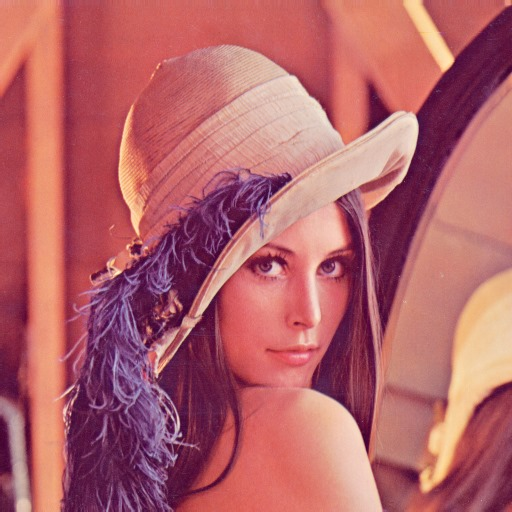

Image Width: 512 pixels
Image Height: 512 pixels
Number of Channels: 3
Total Number of Pixels: 262144


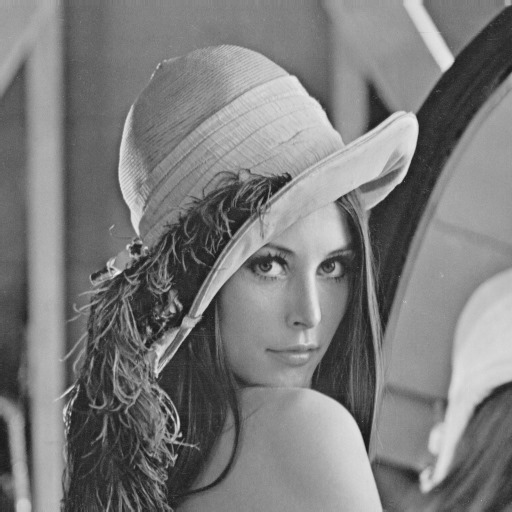

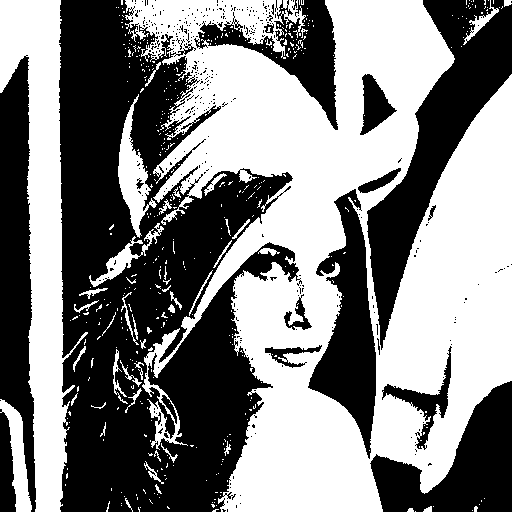

Number of Black Pixels: 128099
Size of Image: 512x512 pixels


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

# 1. Read the image
image = cv2.imread('/content/ra.jpg')

# 2. Display the original image
cv2_imshow(image)

# 3. Extract image size
height, width, channels = image.shape
print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")
print(f"Number of Channels: {channels}")

# 4. Calculate total number of pixels
total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# 6. Convert Grayscale to Binary Image Using a Threshold
#    Here, we use a threshold value of 127; pixels above this value are set to 255 (white), and below to 0 (black).
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

# 6.i. Count the area of black pixels
#      In the binary image, black pixels have a value of 0.
black_pixel_count = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixel_count}")

# Display the size of the image again for reference
print(f"Size of Image: {width}x{height} pixels")


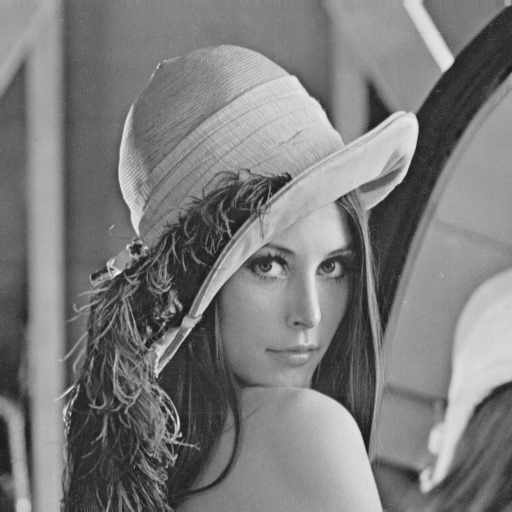

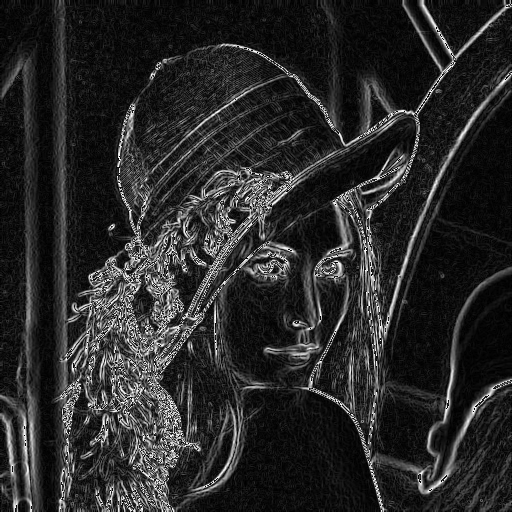

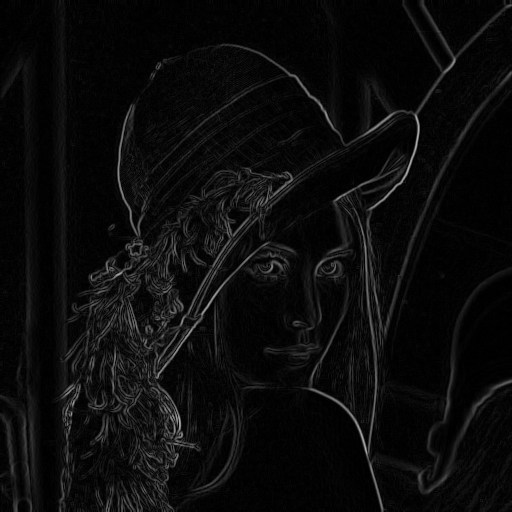

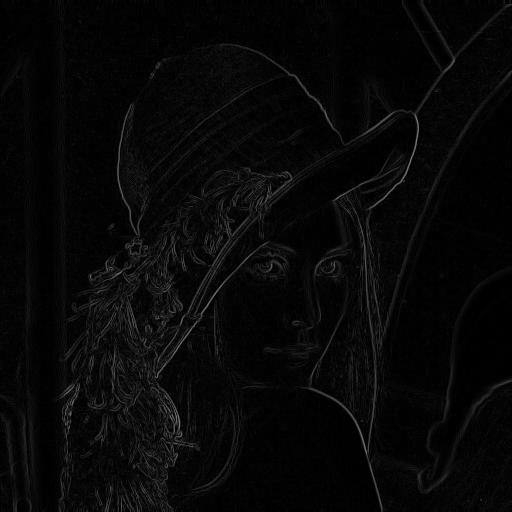

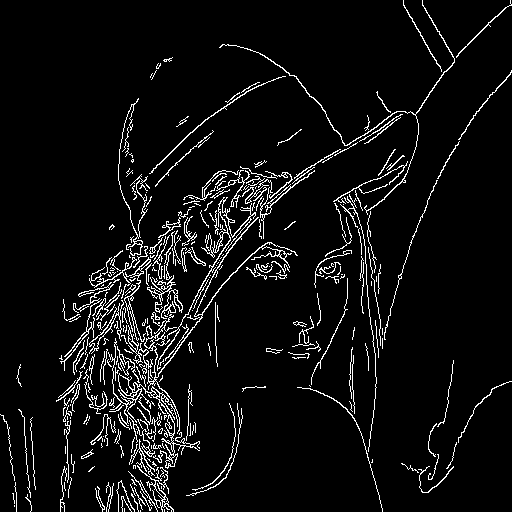

nsec


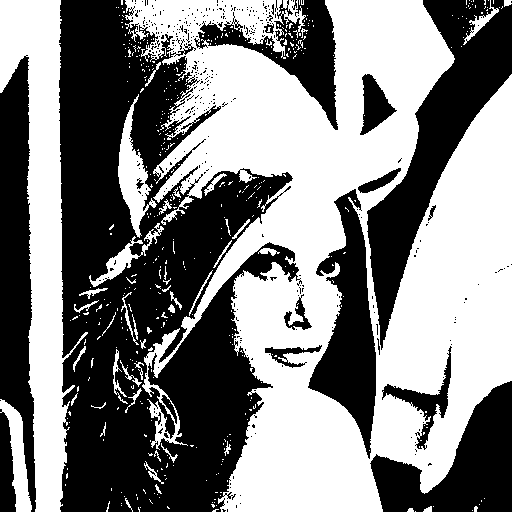

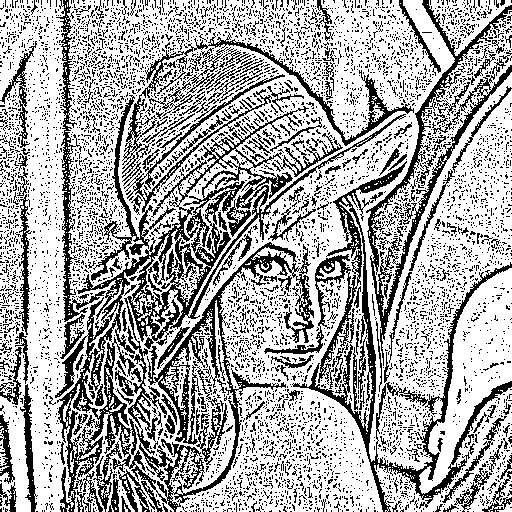

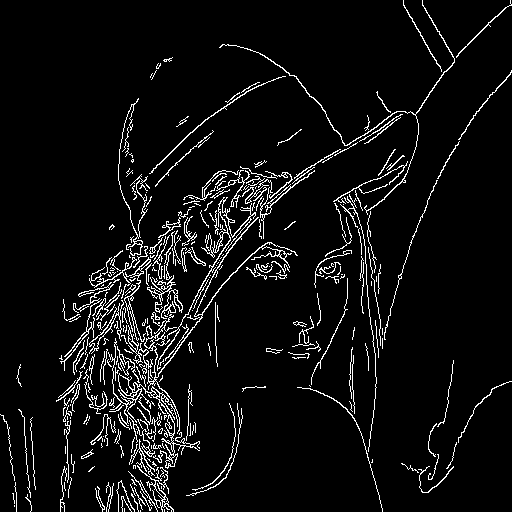

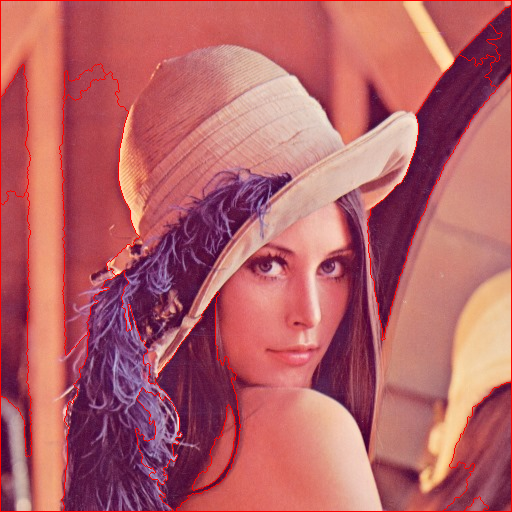

In [ ]:
from scipy.ndimage import convolve
from skimage.filters import prewitt, roberts
from google.colab.patches import cv2_imshow  # For Colab image display

# Load the image
image = cv2.imread('/content/ra.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image
cv2_imshow(image)

### 1. Edge Detection ###

# i. Sobel Operator (X and Y derivatives)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(np.uint8(sobel_combined))

# ii. Prewitt Operator
prewitt_x = prewitt(image, axis=0)
prewitt_y = prewitt(image, axis=1)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

cv2_imshow(np.uint8(prewitt_combined * 255))  # Normalize for display

# iii. Roberts Cross Operator
roberts_edges = roberts(image)
cv2_imshow(np.uint8(roberts_edges * 255))

# iv. Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)
cv2_imshow(canny_edges)

print ("nsec")

### 2. Image Segmentation ###

# i. Global Thresholding
# Converts a greyscale img to binary image
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh)

# iii. Edge Detection for Segmentation (Using Canny)
cv2_imshow(canny_edges)

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert to BGR for watershed
image_color = cv2.imread('/content/ra.jpg')

# Convert to binary
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find sure background and foreground
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels
markers = markers + 1

# Mark unknown region as zero
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]  # Mark boundaries in red

cv2_imshow(image_color)

